In [1]:
### FACIAL EMOTION RECOGNITION ###
import cv2 as cv
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt
import mtcnn

In [3]:
### PRETRAINED MODELS LOADING ###
mtcnn_model = mtcnn.MTCNN()
mobilenet_model = load_model('Resources/Config/mobilenet_7.h5')
mobilenet_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_pad (ZeroPadding2D)   (None, 225, 225, 3)       0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                           

In [29]:
INPUT_SIZE = (224, 224)
idx_to_class = {
    0: 'Anger',
    1: 'Disgust',
    2: 'Fear',
    3: 'Happiness',
    4: 'Neutral',
    5: 'Sadness',
    6: 'Surprise'
}
colors = [(31, 119, 180), (255, 127, 14), (44, 160, 44), (219, 39, 40),
          (148, 103, 189), (140, 86, 75), (227, 119, 194)]

1/1 [==============================] - 0s 23ms/step


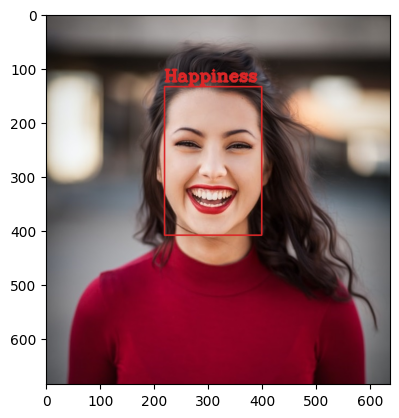

In [32]:
img = cv.imread('Resources/Photos/lady.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
x, y, w, h = mtcnn_model.detect_faces(img_rgb)[0]['box']
face = img_rgb[y:y+h, x:x+w]
face = cv.resize(face, INPUT_SIZE)
data = np.array([face], ndmin=2)
scores = mobilenet_model.predict(data)
class_idx = np.argmax(scores, axis=1)[0]
cv.rectangle(img_rgb, (x, y), (x+w, y+h), colors[class_idx], 2)
cv.putText(img_rgb, idx_to_class[class_idx], (x, y-10), 
           cv.FONT_HERSHEY_COMPLEX, 1, colors[class_idx], 4)
plt.imshow(img_rgb)

1/1 [==============================] - 0s 22ms/step


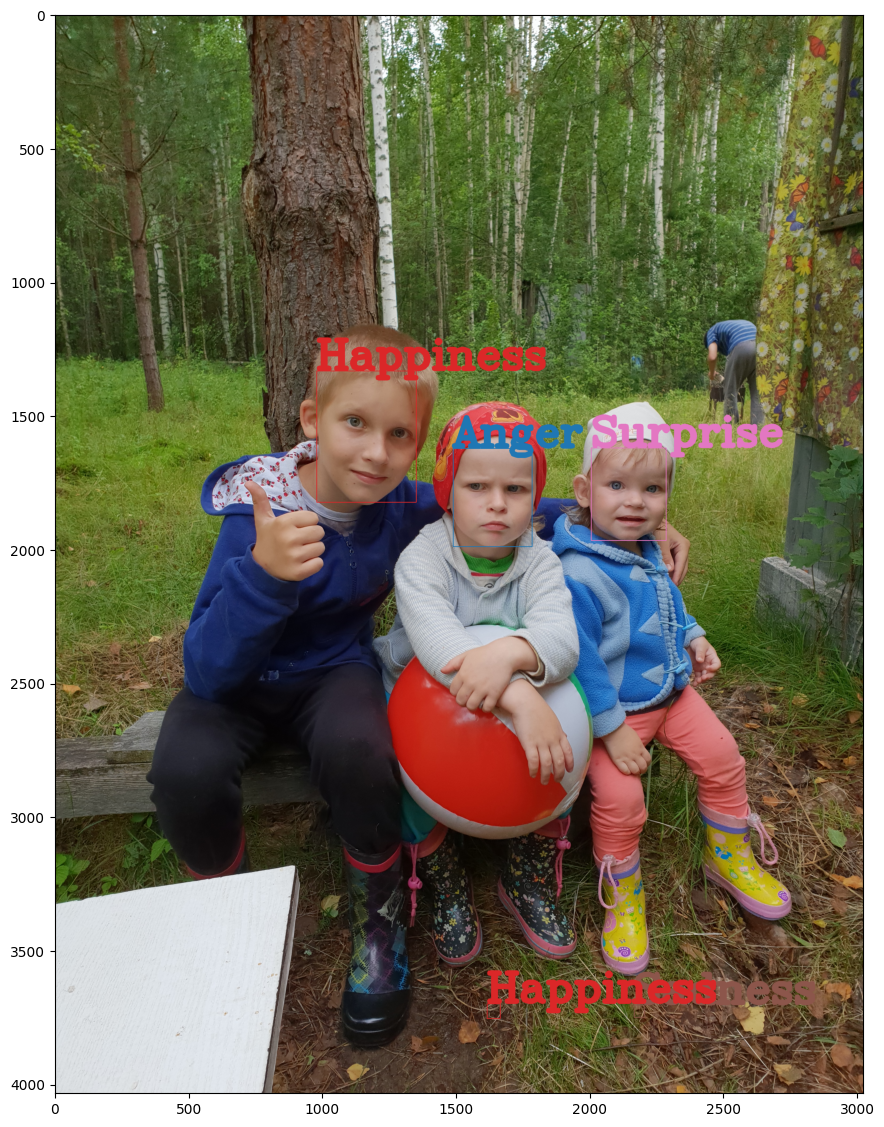

In [48]:
img = cv.imread('Resources/Photos/boys.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
boxes = mtcnn_model.detect_faces(img_rgb)
faces = []
for box in boxes:
    x, y, w, h = box['box']
    face = img_rgb[y:y+h, x:x+w]
    face = cv.resize(face, INPUT_SIZE)
    faces.append(face)
data = np.array(faces, ndmin=2)
scores = mobilenet_model.predict(data)
class_idx = np.argmax(scores, axis=1)
for idx, box in zip(class_idx, boxes):
    x, y, w, h = box['box']
    cv.rectangle(img_rgb, (x, y), (x+w, y+h), colors[idx], 2)
    cv.putText(img_rgb, idx_to_class[idx], (x, y-10), 
               cv.FONT_HERSHEY_COMPLEX, 5, colors[idx], 20)
plt.figure(figsize=(14, 14))
plt.imshow(img_rgb)